In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
start = '2014-01-01'
end = '2024-12-21'
stock = 'WIT'

data = yf.download(stock, start, end)



[*********************100%%**********************]  1 of 1 completed


In [3]:
#data.reset_index(inplace=True)
data.to_csv('wipro_new.csv')

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,6.235,6.250,6.110,6.165,5.789352,440800
2014-01-03,6.205,6.345,6.195,6.325,5.939602,1078200
2014-01-06,6.345,6.345,6.120,6.190,5.812828,2801200
2014-01-07,6.210,6.275,6.140,6.170,5.794047,2304600
2014-01-08,6.130,6.225,6.130,6.215,5.836305,1551000
...,...,...,...,...,...,...
2024-01-29,5.750,5.750,5.680,5.730,5.730000,1495200
2024-01-30,5.700,5.710,5.610,5.650,5.650000,1939400
2024-01-31,5.690,5.740,5.660,5.660,5.660000,2248600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2539 entries, 2014-01-02 to 2024-02-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2539 non-null   float64
 1   High       2539 non-null   float64
 2   Low        2539 non-null   float64
 3   Close      2539 non-null   float64
 4   Adj Close  2539 non-null   float64
 5   Volume     2539 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.9 KB


In [6]:
#data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2.539000e+03
mean,5.532147,5.582152,5.482844,5.533946,5.401576,1.558623e+06
std,1.277115,1.285449,1.268146,1.277221,1.243169,1.097960e+06
min,2.520000,2.650000,2.520000,2.570000,2.527395,1.163000e+05
25%,4.780000,4.820000,4.742500,4.790000,4.710149,8.628000e+05
50%,5.360000,5.400000,5.310000,5.350000,5.247573,1.271300e+06
75%,6.085000,6.140000,6.030000,6.090000,5.869313,1.906250e+06
max,9.950000,9.960000,9.870000,9.950000,9.805917,1.524690e+07


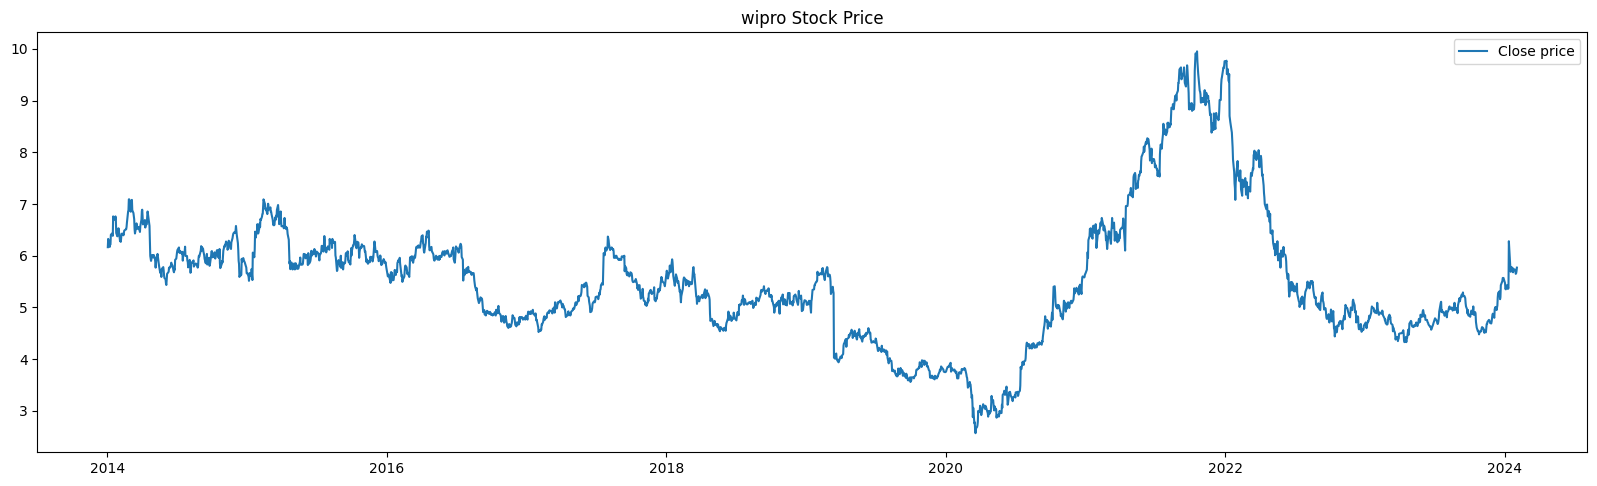

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('wipro Stock Price')
plt.plot(data.Close,label='Close price')
plt.legend()

In [8]:
data=data[['Close']]
data

,Close
Date,
2014-01-02,6.165
2014-01-03,6.325
2014-01-06,6.190
2014-01-07,6.170
2014-01-08,6.215
...,...
2024-01-29,5.730
2024-01-30,5.650
2024-01-31,5.660


In [9]:

data=data.Close.resample('MS').mean() #
data

Date
2014-01-01    6.445000
2014-02-01    6.571579
2014-03-01    6.680238
2014-04-01    6.470000
2014-05-01    5.810714
                ...   
2023-10-01    4.744546
2023-11-01    4.657143
2023-12-01    5.175000
2024-01-01    5.623333
2024-02-01    5.735000
Freq: MS, Name: Close, Length: 122, dtype: float64

In [10]:
data=pd.DataFrame(data)
data=data.astype(int)
data

,Close
Date,
2014-01-01,6
2014-02-01,6
2014-03-01,6
2014-04-01,6
2014-05-01,5
...,...
2023-10-01,4
2023-11-01,4
2023-12-01,5


In [11]:
from statsmodels.tsa.stattools import adfuller #stationry or not

<Axes: xlabel='Date'>

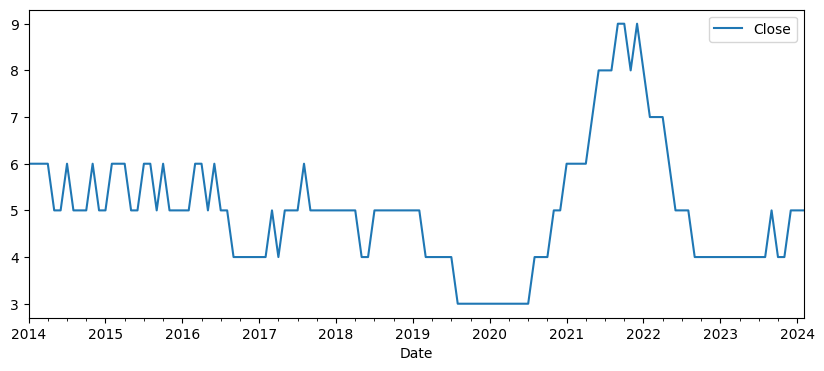

In [31]:
data.plot(figsize=(10,4))

<Axes: ylabel='Density'>

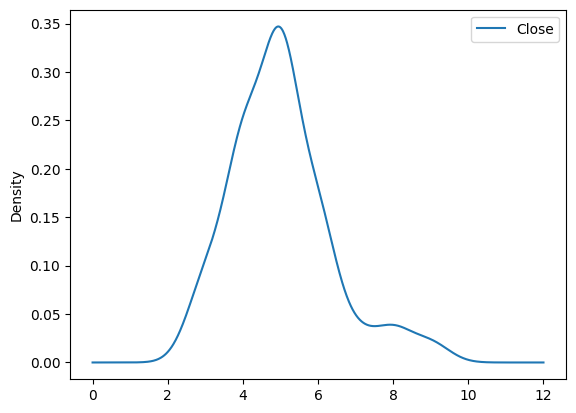

In [12]:
data.plot(kind='kde')

In [13]:
#using arima module
#stationary data chek (fail to rejuct null hypotsis),the serious is non-stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    result = adfuller(data)
    print('adf statistic: %f' %result[0])
    print('p-value %f' %result[1])
adf_test(data['Close'])

adf statistic: -3.396531
p-value 0.011078


<Figure size 2000x1100 with 0 Axes>

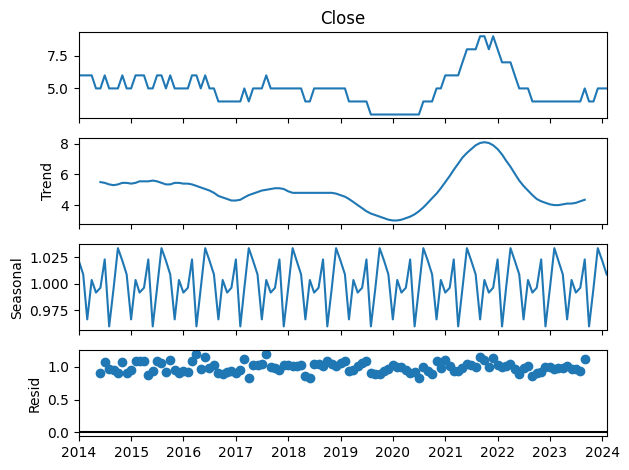

In [14]:
#decompose the data to see the trend,seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,11))
decompose = seasonal_decompose(data['Close'],period=10,model='multiplicative')

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

decompose.plot()
plt.show()

In [15]:
df1=data[['Close']]

In [16]:
df1

,Close
Date,
2014-01-01,6
2014-02-01,6
2014-03-01,6
2014-04-01,6
2014-05-01,5
...,...
2023-10-01,4
2023-11-01,4
2023-12-01,5


In [17]:
data.shape

(122, 1)

In [18]:
df1.isnull().sum()

Close    0
dtype: int64

In [19]:
import numpy as np
df1["t"] = np.arange(1,123)
df1["log_close"] = np.log(df1['Close'])
df1["t_squared"] = df1["t"]*df1["t"]

In [20]:
df1.iloc[0:1,:]

,Close,t,log_close,t_squared
Date,,,,
2014-01-01,6,1,1.791759,1


In [21]:
df1['date']=pd.to_datetime(df1.index,format='%Y-')
df1['month']=df1.date.dt.strftime('%b')
df1['year']=df1['date'].dt.strftime('%Y')

In [22]:
df1.iloc[0:1,:]

,Close,t,log_close,t_squared,date,month,year
Date,,,,,,,
2014-01-01,6,1,1.791759,1,2014-01-01,Jan,2014


In [23]:
dummies=pd.get_dummies(df1['month'])# do not run dummiies variable separately, if you run then to many columns will be created
df1=pd.concat([df1,dummies],axis=1)
df1.to_csv('wipro_forecast.csv', header=True, index=True)

In [24]:
df1=pd.read_csv('wipro_forecast.csv',index_col=0)
df1.iloc[0:3,:] * 1



,Close,t,log_close,t_squared,date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,
2014-01-01,6,1,1.791759,1,2014-01-01,Jan,2014,0,0,0,0,1,0,0,0,0,0,0,0
2014-02-01,6,2,1.791759,4,2014-02-01,Feb,2014,0,0,0,1,0,0,0,0,0,0,0,0
2014-03-01,6,3,1.791759,9,2014-03-01,Mar,2014,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
data_pivot_month=pd.pivot_table(data=df1,values='Close',index='year',columns='month',fill_value=0)

In [26]:
data_pivot_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2014,6.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0
2015,6.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,6.0,5.0
2016,6.0,5.0,4.0,5.0,5.0,5.0,6.0,6.0,5.0,4.0,4.0,4.0
2017,4.0,6.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2018,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0
2019,4.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
2020,3.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0
2021,6.0,8.0,9.0,6.0,6.0,8.0,8.0,6.0,7.0,8.0,9.0,9.0
2022,7.0,5.0,4.0,7.0,8.0,5.0,5.0,7.0,6.0,4.0,4.0,4.0


<Axes: xlabel='month', ylabel='year'>

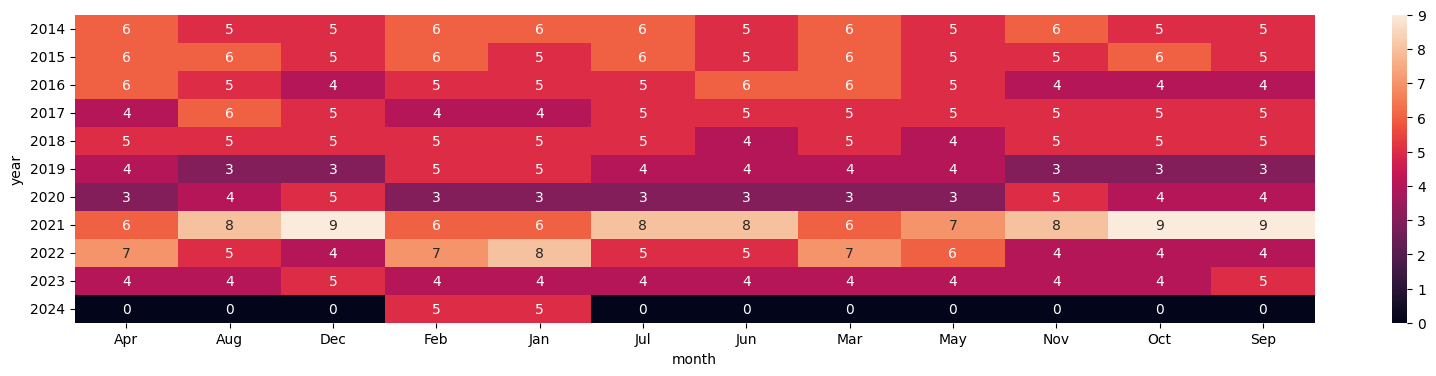

In [27]:
import seaborn as sns
plt.figure(figsize=(20,4))
sns.heatmap(data_pivot_month,annot=True,fmt="g") 

<Axes: xlabel='year', ylabel='Close'>

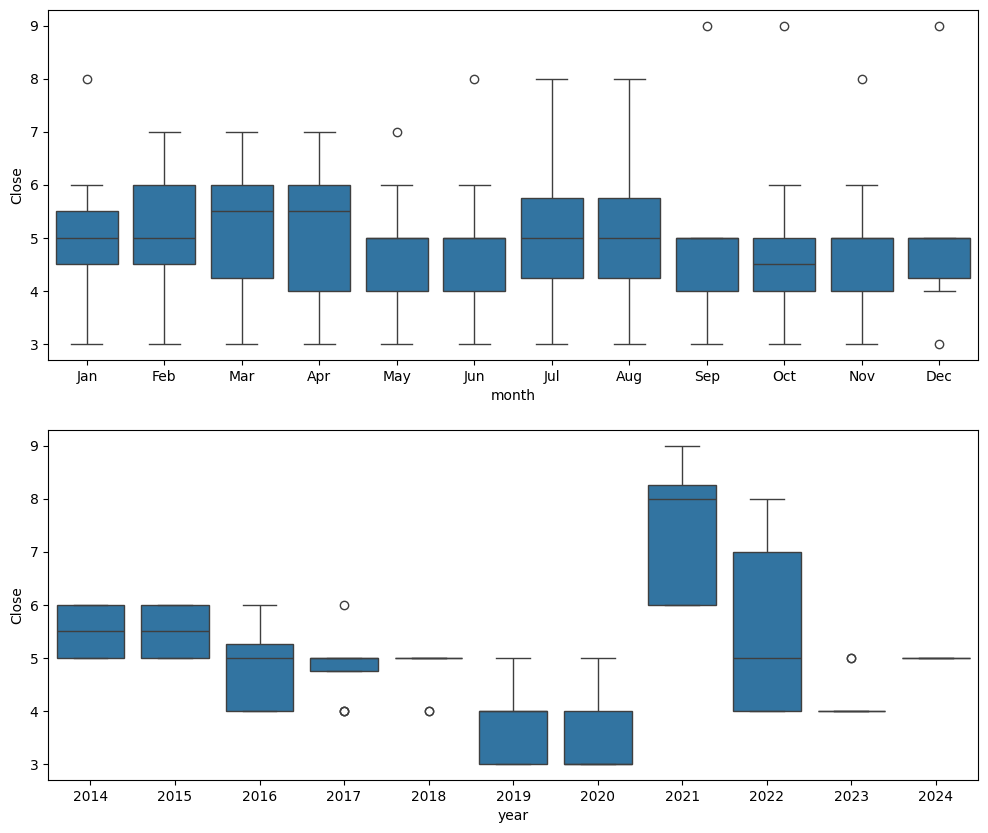

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.boxplot(x='month',y='Close',data=df1)
plt.subplot(212)
sns.boxplot(x='year',y='Close',data=df1)

<Axes: xlabel='month', ylabel='Close'>

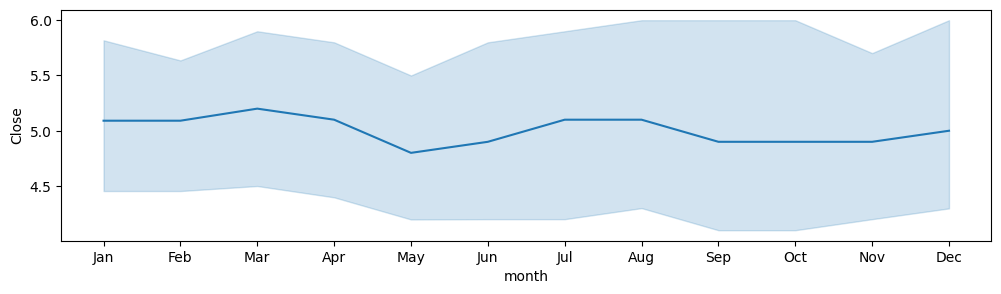

In [29]:
plt.figure(figsize=(12,3))
sns.lineplot(x='month',y='Close',data=df1)

In [30]:
df1.shape

(122, 19)

In [31]:
x_train=df1.head(90)
x_test=df1.tail(32)
print(len(x_train),len(x_test))

90 32


In [32]:
x_test *1

,Close,t,log_close,t_squared,date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,8,91,2.079442,8281,2021-07-01,Jul,2021,0,0,0,0,0,1,0,0,0,0,0,0
2021-08-01,8,92,2.079442,8464,2021-08-01,Aug,2021,0,1,0,0,0,0,0,0,0,0,0,0
2021-09-01,9,93,2.197225,8649,2021-09-01,Sep,2021,0,0,0,0,0,0,0,0,0,0,0,1
2021-10-01,9,94,2.197225,8836,2021-10-01,Oct,2021,0,0,0,0,0,0,0,0,0,0,1,0
2021-11-01,8,95,2.079442,9025,2021-11-01,Nov,2021,0,0,0,0,0,0,0,0,0,1,0,0
2021-12-01,9,96,2.197225,9216,2021-12-01,Dec,2021,0,0,1,0,0,0,0,0,0,0,0,0
2022-01-01,8,97,2.079442,9409,2022-01-01,Jan,2022,0,0,0,0,1,0,0,0,0,0,0,0
2022-02-01,7,98,1.945910,9604,2022-02-01,Feb,2022,0,0,0,1,0,0,0,0,0,0,0,0
2022-03-01,7,99,1.945910,9801,2022-03-01,Mar,2022,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
## model based

In [33]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Close~t',data=x_train).fit()
pred_linear=linear_model.predict(x_test['t'])
rmse_linear=np.sqrt(np.mean((np.array(x_test['Close'])-np.array(pred_linear))**2))
rmse_linear

2.331556718290379

In [34]:
#Exponential

Exp = smf.ols('log_close~t',data=x_train).fit()
pred_Exp = Exp.predict(x_test['t'])
rmse_Exp = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

2.4476515601744495

In [35]:
Quad = smf.ols('Close~t+t_squared',data=x_train).fit()
pred_Quad = Quad.predict(x_test[["t","t_squared"]])
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(pred_Quad))**2))
rmse_Quad

2.153172974715928

In [36]:
#Additive seasonality 

add_sea = smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=x_train).fit()
pred_add_sea = add_sea.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(pred_add_sea))**2))
rmse_add_sea

1.9631820154121606

In [37]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Close~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=x_train).fit()
pred_add_sea_quad = add_sea_Quad.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']])
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

2.152788661030766

In [38]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = x_train).fit()
pred_Mult_sea = Mul_sea.predict(x_test)
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1.9997995257561274

In [39]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_close~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = x_train).fit()
pred_Mult_add_sea = Mul_Add_sea.predict(x_test)
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Close'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

2.4752626689766277

In [40]:
#Compare the results 

df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,1.963182
5,rmse_Mult_sea,1.999800
4,rmse_add_sea_quad,2.152789
2,rmse_Quad,2.153173
0,rmse_linear,2.331557
1,rmse_Exp,2.447652
6,rmse_Mult_add_sea,2.475263


In [41]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df1.Close.dropna())
print(f'ADF statistics: {result[0]}')
print(f'p-value: {result[1]}')


ADF statistics: -3.3965313297197497
p-value: 0.011077688214865588


In [42]:
from statsmodels.graphics.tsaplots import plot_acf

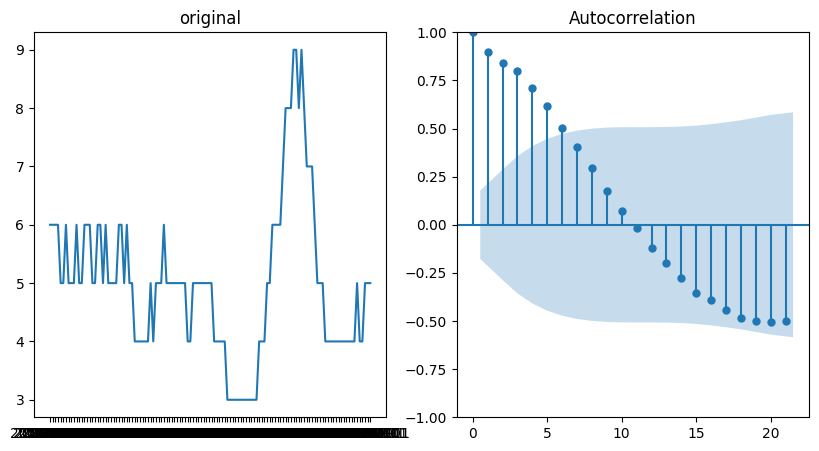

In [43]:
fig,(ax,ax1)=plt.subplots(1,2 ,figsize=(10,5))
ax.plot(df1.Close)
ax.set_title('original')
plot_acf(df1.Close,ax=ax1);

<Axes: xlabel='Date'>

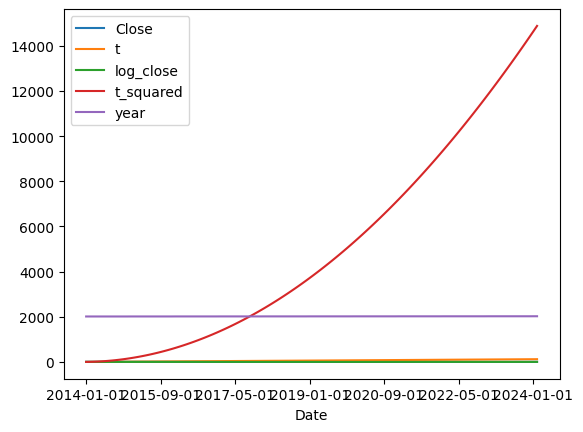

In [44]:
df1.plot()

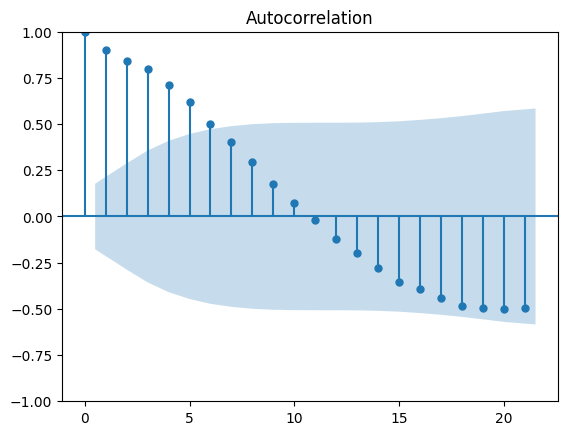

In [45]:
plot_acf(df1['Close']);

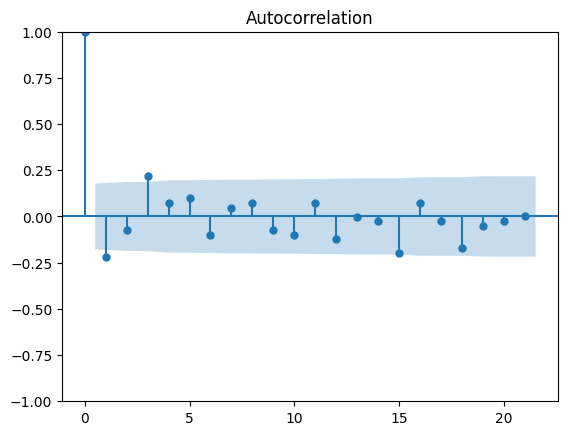

In [46]:
stationary=df1['Close'].diff(periods=1)
plot_acf(stationary[1:]);

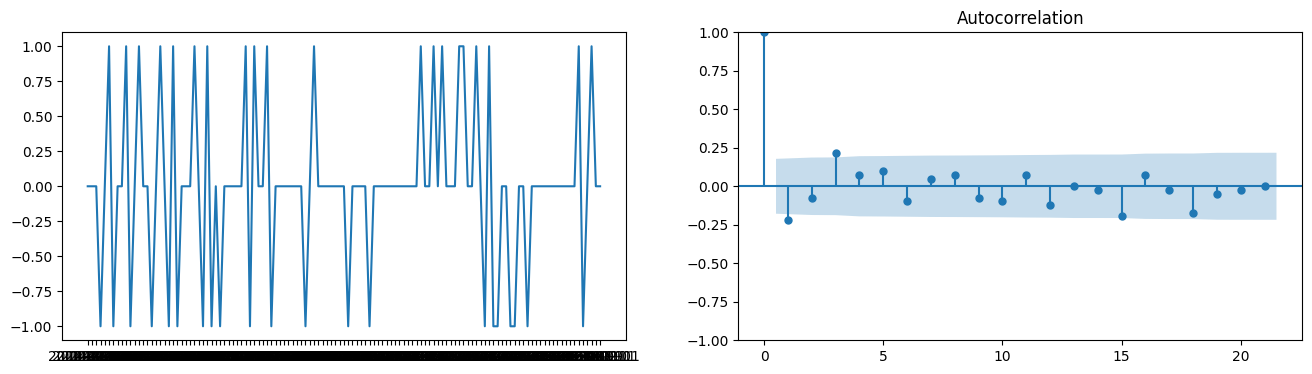

In [47]:
diff=df1.Close.diff().dropna()
fig,(ax,ax1)=plt.subplots(1,2,figsize=(16,4))

ax.plot(diff)
ax1.set_title('difference once')
plot_acf(diff,ax=ax1);

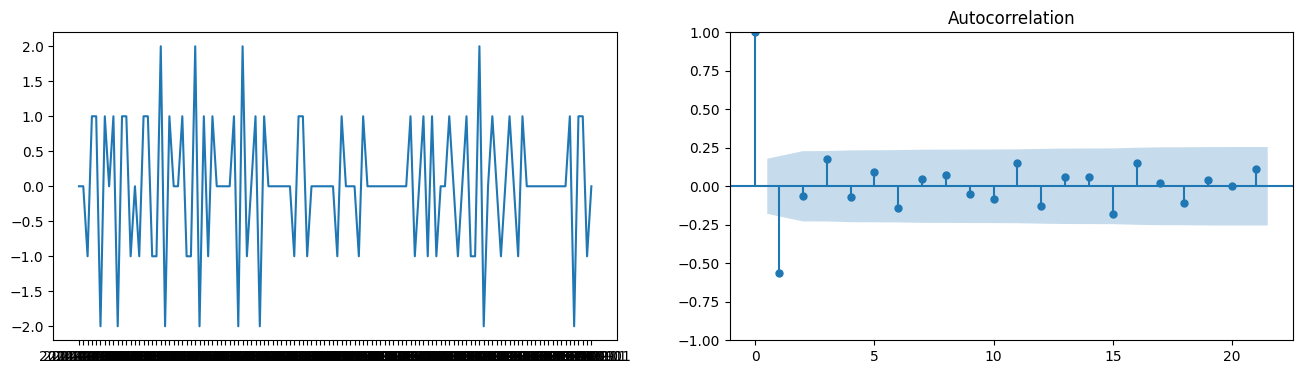

In [48]:
diff=df1.Close.diff().diff().dropna()
fig,(ax,ax1)=plt.subplots(1,2,figsize=(16,4))
ax.plot(diff)
ax1.set_title('difference twice')
plot_acf(diff,ax=ax1);

In [ ]:
#pip install pmdarima

In [49]:
from pmdarima.arima.utils import ndiffs
ndiffs(df1.Close,test='adf')

2

In [ ]:
p

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf


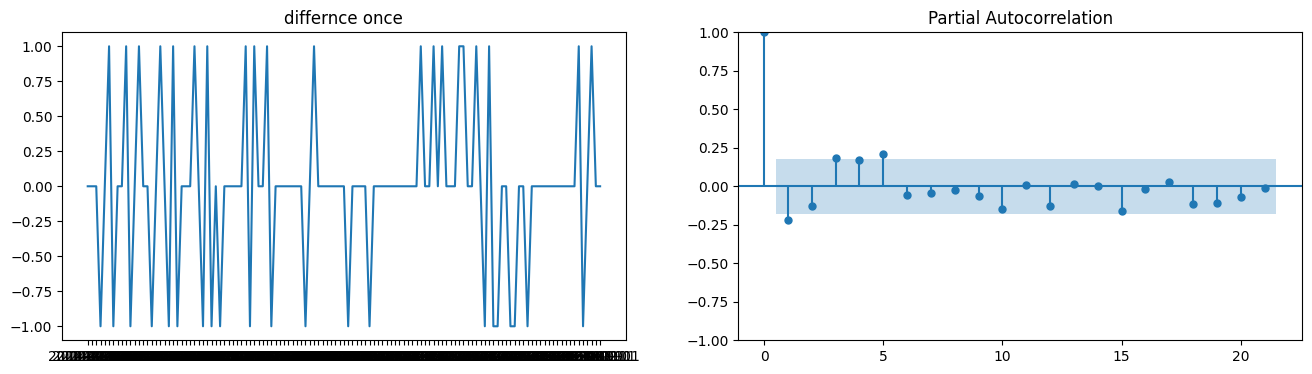

In [51]:
diff= df1.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('differnce once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [ ]:
q

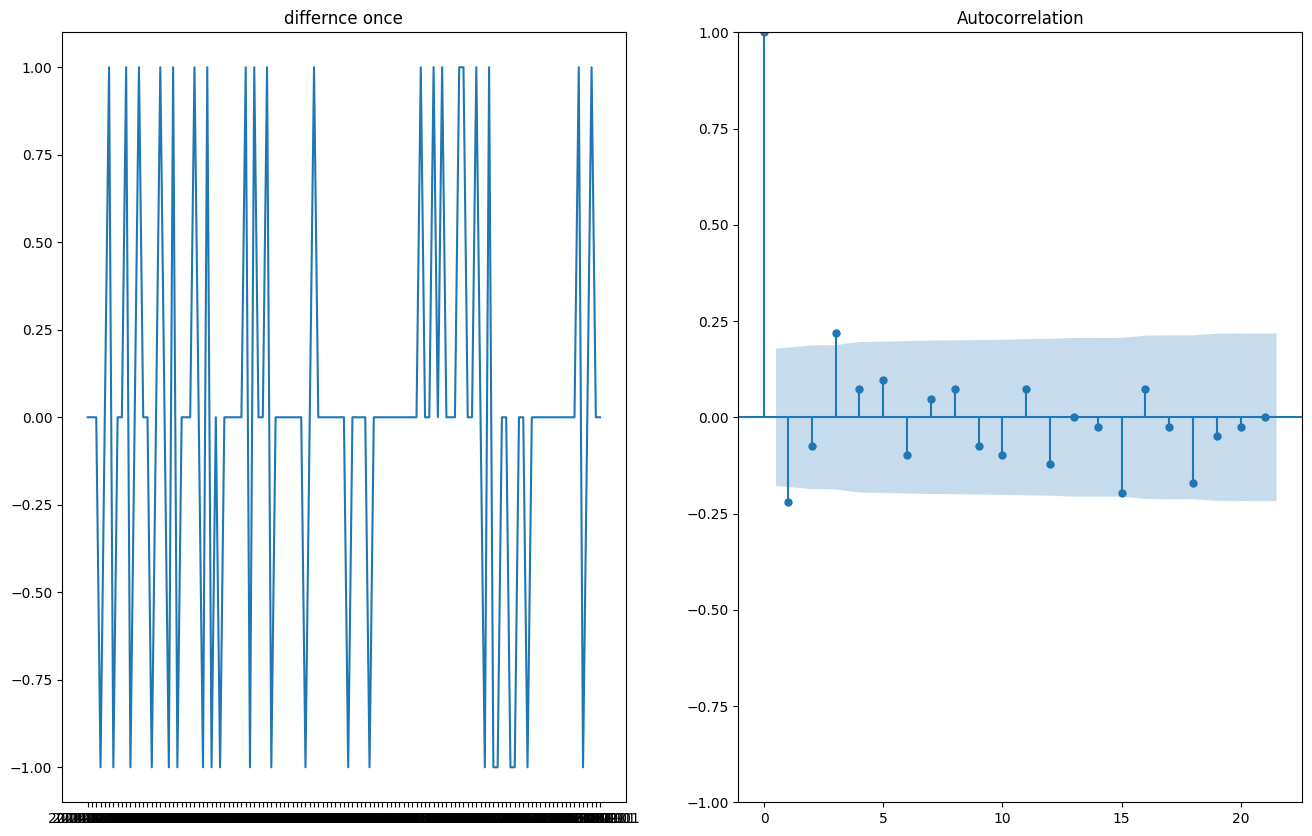

In [52]:
diff= df1.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,10))
ax1.plot(diff)
ax1.set_title('differnce once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

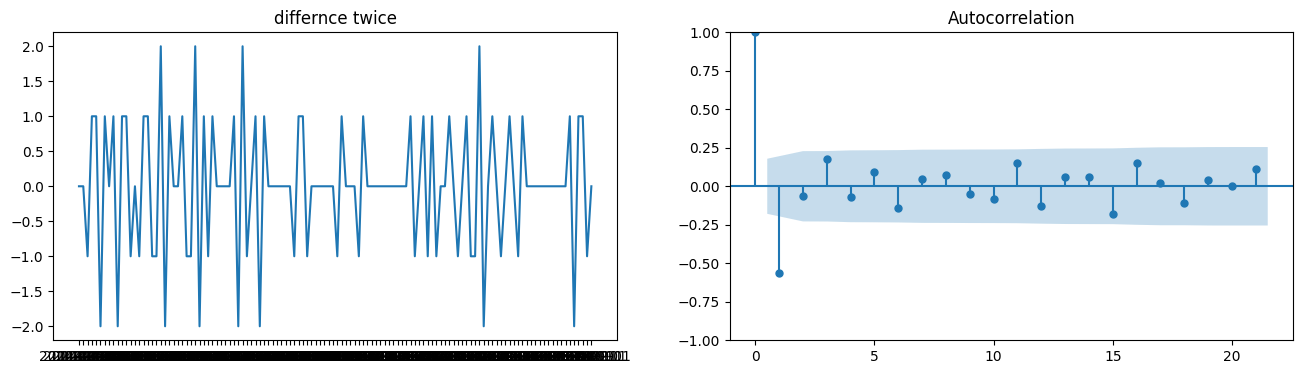

In [53]:
diff= df1.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('differnce twice')
ax2.set_ylim(-0.4,1)
plot_acf(diff,ax=ax2);

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model= ARIMA(df1.Close, order=(5,2,1))# p,q,d how can take
result=model.fit()

C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  122
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 -97.176
Date:                Sun, 04 Feb 2024   AIC                            208.352
Time:                        19:56:59   BIC                            227.864
Sample:                    01-01-2014   HQIC                           216.276
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2852      0.100     -2.862      0.004      -0.481      -0.090
ar.L2         -0.1008      0.106     -0.950      0.342      -0.309       0.107
ar.L3          0.2542      0.110      2.320      0.0

In [57]:
n=int(len(df1)*0.8)
x_train=df1.Close[:n]
x_test=df1.Close[n:]

In [58]:
print(len(x_train))
print(len(x_test))

97
25


In [59]:
df1.shape

(122, 19)

In [60]:
model=ARIMA(x_train,order=(5,2,1))
#result.model.fit()

C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\malka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
model = model.fit()
model.summary()
#result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   97
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 -79.636
Date:                Sun, 04 Feb 2024   AIC                            173.272
Time:                        19:57:21   BIC                            191.149
Sample:                    01-01-2014   HQIC                           180.495
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3411      0.132     -2.589      0.010      -0.599      -0.083
ar.L2         -0.0949      0.129     -0.734      0.463      -0.348       0.159
ar.L3          0.1710      0.153      1.116      0.264      -0.129       0.471
ar.L4          0.1690      0.145      1.165      0.244      -0.115       0.453
ar.L5          0.2468      0.137      1.807      0.071      -0.021       0.514
ma.L1         -0.9941      0.158     -6.280      0.000      -1.304      -0.684
sigma2         0.2993      0.073      4.072      0.000       0.155       0.443
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.88   Prob(JB):                         0.62
Heteroskedasticity (H):               0.70   Skew:                            -0.15
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

2022-02-01    8.337972
2022-03-01    8.335555
2022-04-01    8.071536
2022-05-01    8.313367
2022-06-01    8.081852
2022-07-01    8.191704
2022-08-01    8.188321
2022-09-01    8.131165
2022-10-01    8.206299
2022-11-01    8.162933
2022-12-01    8.203340
2023-01-01    8.212008
2023-02-01    8.212377
2023-03-01    8.245532
2023-04-01    8.247779
2023-05-01    8.271348
2023-06-01    8.286948
2023-07-01    8.301451
2023-08-01    8.323597
2023-09-01    8.337854
2023-10-01    8.357803
2023-11-01    8.375715
2023-12-01    8.393453
2024-01-01    8.412970
2024-02-01    8.430564
Freq: MS, Name: predicted_mean, dtype: float64

[]

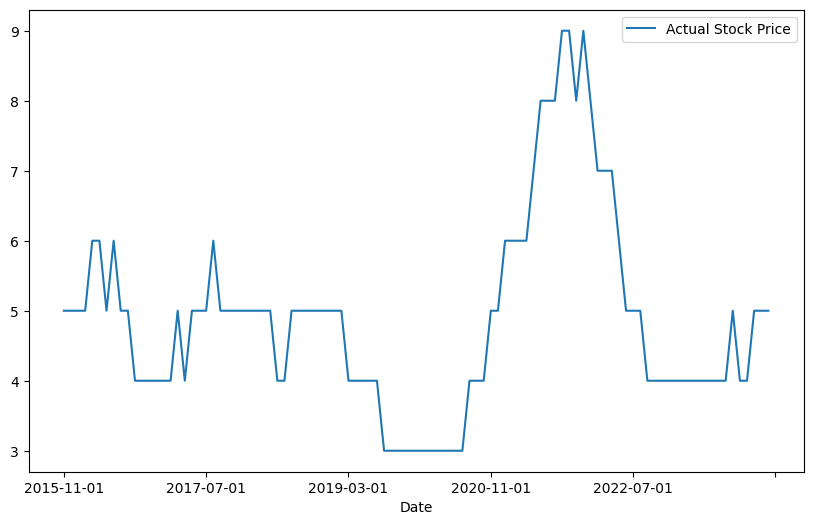

In [63]:
plt.figure(figsize=(10,6), dpi=100)
df1['Close'][-100:].plot(label='Actual Stock Price', legend=True)
plt.plot(label='Predicted Price', legend=True,)

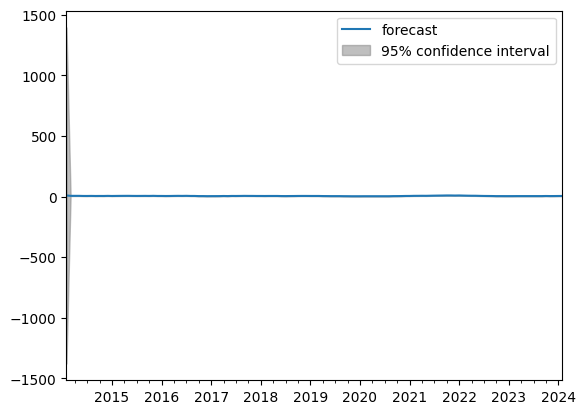

In [64]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=1,end=121,dynamic=False);

In [65]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

3.6838258220735782

In [66]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

-12.548894456246082

In [67]:
#model.save('Stock Predictions Model.keras') 